In [1]:
%matplotlib inline
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import os,sys
import pickle
from helpers import *
from ImageProcessing import *
from PIL import Image
from scipy import ndimage, signal

%load_ext autoreload
%autoreload 2

# 1. Loading  Data

1.1 Loading Train Data

In [2]:
filename_X = "X_2D_patchNo_channels6"
filename_Y = "Y_2D_patchNo_channels6"

infile_X = open(filename_X + ".pickle","rb")
X = np.array(pickle.load(infile_X))
infile_X.close()

infile_Y = open(filename_Y + ".pickle","rb")
Y = np.array(pickle.load(infile_Y))
infile_Y.close()

print("Loaded " + filename_X + " and " + filename_Y)
print("X shape is", X.shape)
print("Y shape is", Y.shape)

Loaded X_2D_patchNo_channels6 and Y_2D_patchNo_channels6
X shape is (800, 400, 400, 3)
Y shape is (800, 400, 400)


1.2 Loading Test Data

In [2]:
filename_X_test = "Xtest_2D_patch16_channels14"

infile_X_test = open(filename_X_test + ".pickle","rb")
X_test = pickle.load(infile_X_test)
infile_X_test.close()
print("Loaded " + filename_X_test + ".pickle")
print("X_test shape is", X_test.shape)

Loaded Xtest_2D_patch16_channels14.pickle
X_test shape is (50, 38, 38, 14)


1.4 Loading Model

In [ ]:
modelname = "1DModel_Aug"

model = keras.models.load_model(modelname + ".h5")

# 2. Training Neural Net

2.1 Loading Tensorflow library

In [4]:
import tensorflow as tf
from tensorflow.python import keras

2.2 Normalization of data

In [5]:
x_train = keras.utils.normalize(X)
del X

Y[np.where(Y>=0.25)]=1
Y[np.where(Y<0.25)]=0
y_train = keras.utils.to_categorical(Y,num_classes=2)

del Y
print("x_train shape:",x_train.shape)
print("y_train shape:", y_train.shape)

x_train shape: (800, 400, 400, 3)
y_train shape: (800, 400, 400, 2)


2.3 Initialization of a 2D convolutional network

In [5]:
model = keras.Sequential()

model.add(keras.layers.Dense(100,activation='relu',input_shape=x_train.shape[1:4]))
model.add(keras.layers.Conv2D(filters=5,kernel_size=(2,2),strides=(2,2),padding='valid',data_format='channels_last',use_bias=True))
model.add(keras.layers.Conv2D(filters=5,kernel_size=(2,2),strides=(2,2),padding='valid',data_format='channels_last',use_bias=True))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Conv2DTranspose(filters=10,kernel_size=(2,2),strides=(2,2),activation='relu',padding='valid',data_format='channels_last',use_bias=True)),
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Conv2DTranspose(filters=5,kernel_size=(2,2),strides=(2,2)))

model.add(keras.layers.Dense(2,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400, 400, 100)     400       
_________________________________________________________________
conv2d (Conv2D)              (None, 200, 200, 5)       2005      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 5)       105       
_________________________________________________________________
dense_1 (Dense)              (None, 100, 100, 100)     600       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 200, 200, 10)      4010      
_________________________________________________________________
dense_2 (Dense)              (None, 200, 200, 100)     1100      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 400, 400, 5)       2

2.4 Initialization of optimization method, loss function and metric

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

2.5 Training

In [ ]:
model.fit(x_train,y_train,validation_split=0.2, epochs=50,verbose = 2)

Train on 640 samples, validate on 160 samples
Epoch 1/50


# 3. Submission

In [25]:
y_pred = model.predict(x_train[3:4])

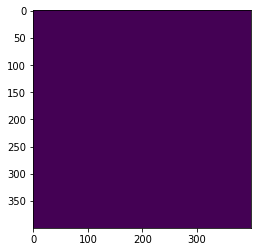

In [28]:
plt.imshow(np.argmax(y_pred[0],axis=-1))